## 多元统计作业

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data.xlsx',index_col=1)
data.drop('行业',axis=1, inplace=True)
data.head()

,净资产收益率%,总资产报酬率%,资产负债率%,总资产周转率,流动资产周转率,已获利息倍数,销售增长率%,资本积累率%
公司简称,,,,,,,,
深能源Ａ,16.85,12.35,42.32,0.37,1.78,7.18,45.73,54.54
深南电Ａ,22.00,15.30,46.51,0.76,1.77,15.67,48.11,19.41
富龙热力,8.97,7.98,30.56,0.17,0.58,10.43,17.80,9.44
穗恒运Ａ,10.25,8.99,40.44,0.46,2.46,5.06,11.06,1.09
粤电力Ａ,20.81,20.00,35.87,0.43,1.25,34.89,24.77,12.67


### 计算协方差矩阵

In [3]:
## 协方差矩阵
data.cov()

,净资产收益率%,总资产报酬率%,资产负债率%,总资产周转率,流动资产周转率,已获利息倍数,销售增长率%,资本积累率%
净资产收益率%,45.000089,26.121776,5.541207,2.106240,3.295776,29.274956,166.076553,71.188934
总资产报酬率%,26.121776,19.085029,-10.504968,1.140290,2.105428,24.454818,87.794743,38.735140
资产负债率%,5.541207,-10.504968,231.037089,0.993063,-0.447052,-52.063364,93.004668,-93.271886
总资产周转率,2.106240,1.140290,0.993063,0.208253,0.243159,0.544810,9.500352,3.410664
流动资产周转率,3.295776,2.105428,-0.447052,0.243159,0.463779,1.559520,11.715595,5.793557
已获利息倍数,29.274956,24.454818,-52.063364,0.544810,1.559520,70.951536,72.885000,84.380773
销售增长率%,166.076553,87.794743,93.004668,9.500352,11.715595,72.885000,1446.433118,334.684011
资本积累率%,71.188934,38.735140,-93.271886,3.410664,5.793557,84.380773,334.684011,478.163784


### 证明: $E(X'AX) = tr(A\Sigma) + \mu'A\mu$

In [4]:
np.random.seed(0)
A = np.random.random(size=[data.shape[1], data.shape[1]])
Sigma = data.cov()
mu = np.mean(data.values, axis=0)

$ tr(A\Sigma) + \mu'A\mu$

In [5]:
np.trace(np.dot(A, Sigma)) + np.dot(np.dot(mu,A),mu)

7529.9599142114494

$E(X'AX)$

In [6]:
a = 0
for i in range(data.shape[0]):
    a += np.dot(np.dot(data.iloc[i,:], A), data.iloc[i,:].T)
a = a / data.shape[0]
a

7493.5434644253855

In [7]:
np.mean(np.dot(np.dot(data, A), data.T))

6255.3841716991619

### 求相关矩阵

In [8]:
data.corr()

,净资产收益率%,总资产报酬率%,资产负债率%,总资产周转率,流动资产周转率,已获利息倍数,销售增长率%,资本积累率%
净资产收益率%,1.000000,0.891353,0.054345,0.688028,0.721432,0.518094,0.650957,0.485308
总资产报酬率%,0.891353,1.000000,-0.158200,0.571971,0.707682,0.664564,0.528412,0.405481
资产负债率%,0.054345,-0.158200,1.000000,0.143166,-0.043188,-0.406640,0.160885,-0.280622
总资产周转率,0.688028,0.571971,0.143166,1.000000,0.782419,0.141732,0.547388,0.341787
流动资产周转率,0.721432,0.707682,-0.043188,0.782419,1.000000,0.271866,0.452334,0.389046
已获利息倍数,0.518094,0.664564,-0.406640,0.141732,0.271866,1.000000,0.227514,0.458115
销售增长率%,0.650957,0.528412,0.160885,0.547388,0.452334,0.227514,1.000000,0.402437
资本积累率%,0.485308,0.405481,-0.280622,0.341787,0.389046,0.458115,0.402437,1.000000


### 标准化后矩阵的协方差为原来矩阵的相关系数

In [9]:
## 标准化
data2 = (data - data.mean()) / data.std()

In [10]:
## 标准化后的协方差
data2.cov()

,净资产收益率%,总资产报酬率%,资产负债率%,总资产周转率,流动资产周转率,已获利息倍数,销售增长率%,资本积累率%
净资产收益率%,1.000000,0.891353,0.054345,0.688028,0.721432,0.518094,0.650957,0.485308
总资产报酬率%,0.891353,1.000000,-0.158200,0.571971,0.707682,0.664564,0.528412,0.405481
资产负债率%,0.054345,-0.158200,1.000000,0.143166,-0.043188,-0.406640,0.160885,-0.280622
总资产周转率,0.688028,0.571971,0.143166,1.000000,0.782419,0.141732,0.547388,0.341787
流动资产周转率,0.721432,0.707682,-0.043188,0.782419,1.000000,0.271866,0.452334,0.389046
已获利息倍数,0.518094,0.664564,-0.406640,0.141732,0.271866,1.000000,0.227514,0.458115
销售增长率%,0.650957,0.528412,0.160885,0.547388,0.452334,0.227514,1.000000,0.402437
资本积累率%,0.485308,0.405481,-0.280622,0.341787,0.389046,0.458115,0.402437,1.000000


In [11]:
## 原来的相关系数
data.corr()

,净资产收益率%,总资产报酬率%,资产负债率%,总资产周转率,流动资产周转率,已获利息倍数,销售增长率%,资本积累率%
净资产收益率%,1.000000,0.891353,0.054345,0.688028,0.721432,0.518094,0.650957,0.485308
总资产报酬率%,0.891353,1.000000,-0.158200,0.571971,0.707682,0.664564,0.528412,0.405481
资产负债率%,0.054345,-0.158200,1.000000,0.143166,-0.043188,-0.406640,0.160885,-0.280622
总资产周转率,0.688028,0.571971,0.143166,1.000000,0.782419,0.141732,0.547388,0.341787
流动资产周转率,0.721432,0.707682,-0.043188,0.782419,1.000000,0.271866,0.452334,0.389046
已获利息倍数,0.518094,0.664564,-0.406640,0.141732,0.271866,1.000000,0.227514,0.458115
销售增长率%,0.650957,0.528412,0.160885,0.547388,0.452334,0.227514,1.000000,0.402437
资本积累率%,0.485308,0.405481,-0.280622,0.341787,0.389046,0.458115,0.402437,1.000000


### 马氏距离

#### 点到点的马氏距离

In [12]:
from scipy.spatial import distance

In [13]:
## 计算第一个点
dis_one = distance.mahalanobis(data.iloc[0], data.iloc[1],np.linalg.inv(data.cov()))
dis_one

3.3545424558841019

In [14]:
## 计算一一个样本所有点的马氏距离
dis_all = pd.DataFrame(distance.cdist(data, data, metric='mahalanobis', V = np.linalg.inv(data.cov())),columns=data.index.values, index=data.index.values)
dis_all.head()

,深能源Ａ,深南电Ａ,富龙热力,穗恒运Ａ,粤电力Ａ,韶能股份,惠天热电,原水股份,大连热电,龙电股份,...,中 关 村,中兴通讯,长城电脑,青鸟华光,清华同方,永鼎光缆,宏图高科,海星科技,方正科技,复华实业
深能源Ａ,0.000000,3.379118,3.874762,4.398155,5.644342,4.053026,4.402957,4.000154,3.782060,5.393734,...,6.365799,3.992209,3.946725,4.480630,4.421643,5.207624,4.023286,5.073387,6.659423,4.330594
深南电Ａ,3.379118,0.000000,2.461015,4.190203,3.605859,3.855684,2.217316,2.649428,2.076872,4.557174,...,4.492618,2.793176,2.910862,2.734690,5.220889,3.472708,2.558000,3.602563,5.008292,2.984867
富龙热力,3.874762,2.461015,0.000000,4.630450,4.138633,3.117996,1.745931,1.639896,1.291378,3.807715,...,4.606979,3.200095,3.009992,1.108109,4.622174,2.438251,2.673798,2.268543,5.723838,1.421010
穗恒运Ａ,4.398155,4.190203,4.630450,0.000000,6.295367,5.212151,4.630793,5.304445,3.996461,6.315439,...,6.208700,5.860063,4.245158,5.372205,6.853964,4.514394,5.176371,4.860329,7.108400,4.698155
粤电力Ａ,5.644342,3.605859,4.138633,6.295367,0.000000,4.750881,3.825051,3.760294,4.110323,5.115032,...,5.269970,4.953507,5.177451,3.715594,6.793018,4.584830,4.981956,5.273549,6.650183,4.918128


In [15]:
## 计算一个点到一个总体的距离
distance.mahalanobis(data.iloc[0], data.mean(),np.linalg.inv(data.cov()))

3.6490571291389871

## PCA 降维

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)#data.shape[1])
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
## 解释方差 及贡献率
pd.DataFrame({'方差': pca.explained_variance_,
              '贡献率': pca.explained_variance_ratio_,
             '累计贡献率': np.cumsum(pca.explained_variance_ratio_)})

,方差,累计贡献率,贡献率
0,1587.172742,0.692682,0.692682
1,456.441006,0.891885,0.199202


In [33]:
## 成分
component = pd.DataFrame(pca.components_)
component

,0,1,2,3,4,5,6,7
0,0.117628,0.062777,0.041878,0.006530,0.008420,0.063632,0.942812,0.295655
1,0.047853,0.046320,-0.486906,0.000262,0.005455,0.201150,-0.254503,0.808223


In [36]:
data_transform = pd.DataFrame(pca.transform(data), index=data.index.values)
data_transform.head()

,0,1
深能源Ａ,38.832000,27.852772
深南电Ａ,32.198675,-1.095044
富龙热力,-2.333111,4.303850
穗恒运Ａ,-10.852640,-6.501903
粤电力Ａ,9.126691,8.602257


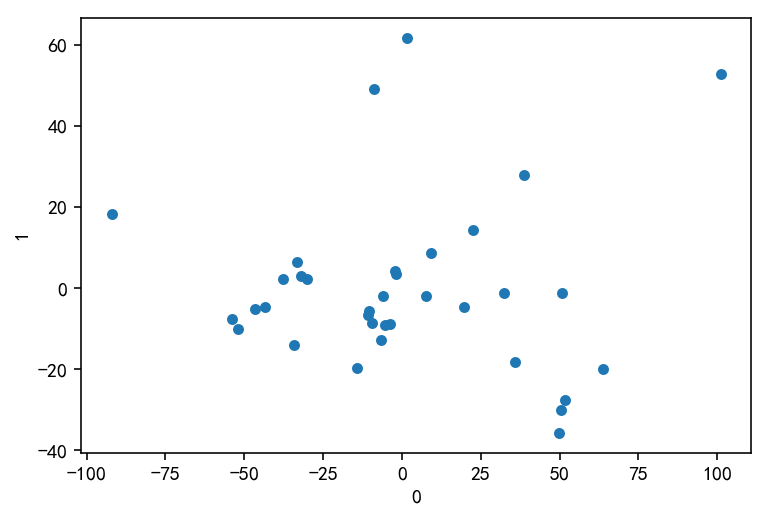

In [37]:
data_transform.plot.scatter(0,1)

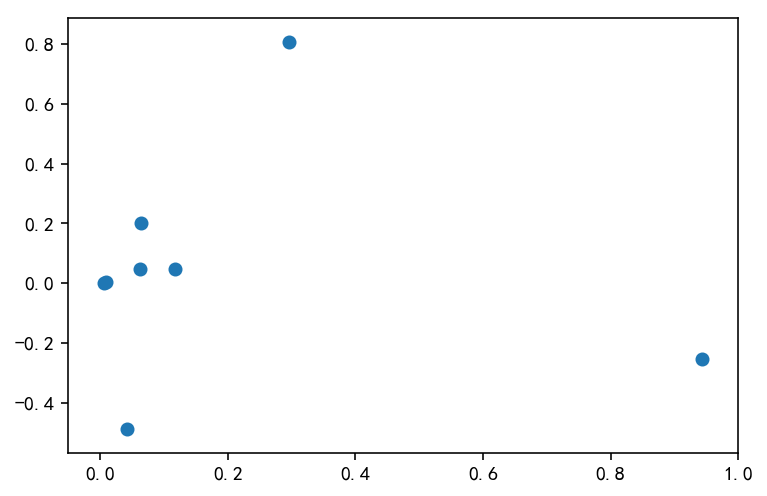

In [38]:
plt.scatter(component.iloc[0,:], component.iloc[1,:])